In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #weather data chart
import seaborn as sns #for line plot, bar plot, scatter plot
import plotly.express as ax #creating complex charts, maps, and 3D visualizations
import matplotlib.ticker as tck #customize the appearance control their positions, and format their labels to suit your needs.
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\Bangalore_1990_2022_BangaloreCity.csv
data\Chennai_1990_2022_Madras.csv
data\Delhi_NCR_1990_2022_Safdarjung.csv
data\Lucknow_1990_2022.csv
data\Mumbai_1990_2022_Santacruz.csv
data\Rajasthan_1990_2022_Jodhpur.csv
data\Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv
data\weather_Bhubhneshwar_1990_2022.csv
data\weather_Rourkela_2021_2022.csv


In [23]:
df = pd.DataFrame()


# looping through files names
# splitting the filename to get city name
# reading the data files as dataframe in temp variable and adding a column city as identifier
# concatenating the temp dataframe to df
# reading the file with Geolocation Tagging into a separate dataframe geolocation

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        s = pd.Series([filename])
        x = s.str.split(pat = '_', expand = True).iloc[0,0]
        y = s.str.split(pat = '_', expand = True).iloc[0,1]  #reading 2nd split in files with string'weather' in name
             
        
        if x =='Station': # ignoring the concatenation of data with geolocation
            
            geolocation = temp
            
        elif x != 'weather':
            temp = pd.read_csv(os.path.join(dirname, filename),parse_dates = ['time'])
            temp['city'] = x
            df = pd.concat([df, temp])
            
        
        else:
            temp = pd.read_csv(os.path.join(dirname, filename),parse_dates = ['time'])
            temp['city'] = y
            df = pd.concat([df, temp]) 

  
              

In [24]:
geolocation 

,time,tavg,tmin,tmax,prcp,city
0,01-01-1990,22.9,19.1,28.4,NaN,Rajasthan
1,02-01-1990,21.7,NaN,26.5,0.0,Rajasthan
2,03-01-1990,21.0,16.4,26.5,0.0,Rajasthan
3,04-01-1990,20.8,NaN,27.4,0.0,Rajasthan
4,05-01-1990,20.4,14.2,26.1,0.0,Rajasthan
...,...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5,Rajasthan
11890,22-07-2022,23.2,21.1,27.9,0.0,Rajasthan
11891,23-07-2022,23.1,20.9,26.7,0.0,Rajasthan
11892,24-07-2022,22.8,20.0,26.7,0.3,Rajasthan


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83725 entries, 0 to 425
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    83725 non-null  object 
 1   tavg    83235 non-null  float64
 2   tmin    68266 non-null  float64
 3   tmax    76562 non-null  float64
 4   prcp    47526 non-null  float64
 5   city    83725 non-null  object 
 6   snow    0 non-null      float64
 7   wdir    1718 non-null   float64
 8   wspd    2553 non-null   float64
 9   wpgt    0 non-null      float64
 10  pres    1667 non-null   float64
 11  tsun    0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 8.3+ MB


In [26]:
df.head()

,time,tavg,tmin,tmax,prcp,city,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,21.7,NaN,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,20.8,NaN,27.4,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df

,time,tavg,tmin,tmax,prcp,city,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,21.7,NaN,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,20.8,NaN,27.4,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-08-31 00:00:00,29.0,26.6,33.5,2.0,Rourkela,NaN,187.0,8.6,NaN,1006.8,NaN
422,2022-09-01 00:00:00,29.1,25.7,33.2,11.5,Rourkela,NaN,205.0,6.7,NaN,1007.2,NaN
423,2022-09-02 00:00:00,29.4,26.4,33.7,1.5,Rourkela,NaN,189.0,7.0,NaN,1007.5,NaN
424,2022-09-03 00:00:00,28.7,26.6,32.6,8.0,Rourkela,NaN,203.0,8.0,NaN,1005.8,NaN


In [28]:
#Find the hottest/coldest years for each city?
#Find precipitation averages and tell when rainfall was abnormally less or abnormally more?
#Prove that temperature is increasing and if so at what rate (degree increase/ year)?
#Creating Visualization

In [29]:
# Finding the maximum temperature for each city
max_temp = df.groupby('city')['tavg'].max().reset_index()
max_temp.rename(columns={'tavg': 'max_temp'}, inplace=True)

# Finding the minimum temperature for each city
min_temp = df.groupby('city')['tavg'].min().reset_index()
min_temp.rename(columns={'tavg': 'min_temp'}, inplace=True)

# Combining the maximum and minimum temperatures into a single DataFrame
citywise = pd.concat([max_temp, min_temp], ignore_index=True)

# Finding the hottest and coldest years for each city
max_min = df.merge(citywise, on=['city'], how='inner')

In [30]:
# trying to set color coded bars and sorting chart display but did not work
max_min.sort_values(by=['city','time'], inplace = True)
max_min.reset_index(drop=True, inplace=True)
max_min

,time,tavg,tmin,tmax,prcp,city,snow,wdir,wspd,wpgt,pres,tsun,max_temp,min_temp
0,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,32.4,NaN
1,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.2
2,01-01-1991,23.6,20.0,27.6,0.3,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,32.4,NaN
3,01-01-1991,23.6,20.0,27.6,0.3,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.2
4,01-01-1992,22.2,18.9,26.8,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,32.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167445,2022-09-02 00:00:00,29.4,26.4,33.7,1.5,Rourkela,NaN,189.0,7.0,NaN,1007.5,NaN,NaN,14.6
167446,2022-09-03 00:00:00,28.7,26.6,32.6,8.0,Rourkela,NaN,203.0,8.0,NaN,1005.8,NaN,35.0,NaN
167447,2022-09-03 00:00:00,28.7,26.6,32.6,8.0,Rourkela,NaN,203.0,8.0,NaN,1005.8,NaN,NaN,14.6
167448,2022-09-04 00:00:00,28.2,25.9,31.8,17.7,Rourkela,NaN,211.0,6.8,NaN,1004.8,NaN,35.0,NaN


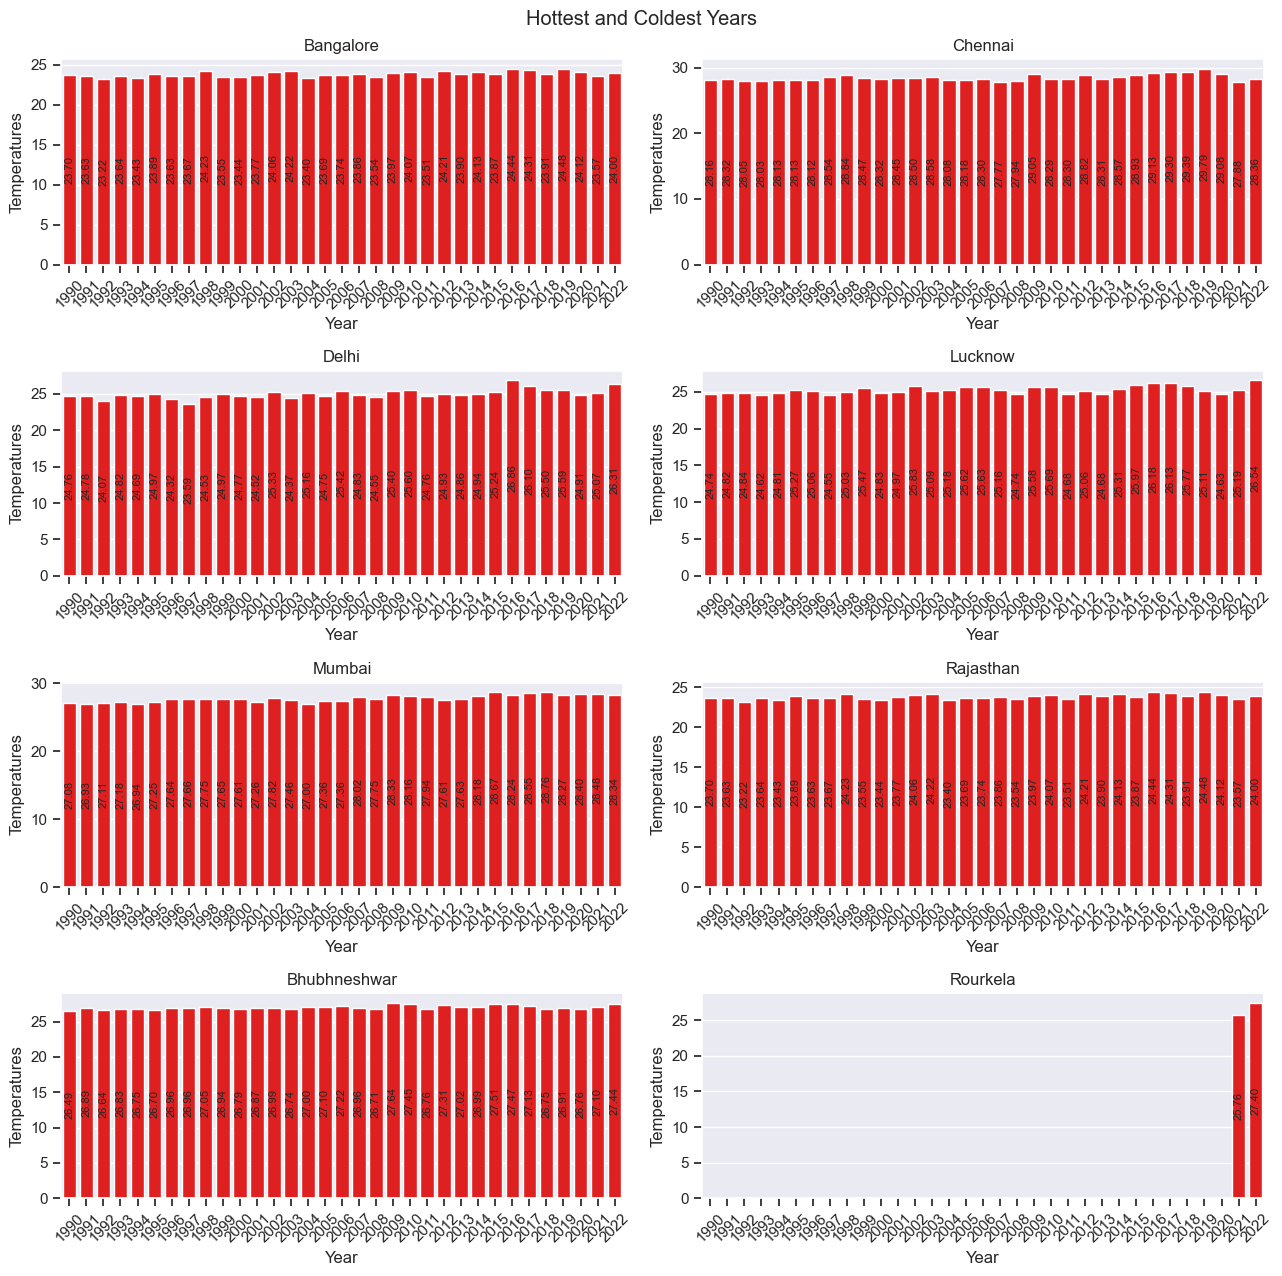

In [31]:
min_tavg_cache = {}

# Convert 'time' column to datetime
max_min['time'] = pd.to_datetime(max_min['time'], format='%d-%m-%Y')

fig, ax = plt.subplots(4, 2, figsize=(13, 13))
plt.suptitle('Hottest and Coldest Years')

for i, c in enumerate(df['city'].unique()):
    if c in min_tavg_cache:
        min_tavg = min_tavg_cache[c]
    else:
        citywise = max_min.loc[max_min['city'] == c]
        min_tavg = min(citywise['tavg'])
        min_tavg_cache[c] = min_tavg
    
    citywise = max_min.loc[max_min['city'] == c]
    color = ["red" if val > min_tavg else "blue" for val in citywise['tavg']]
    
    axs = ax.flatten()[i]
    sns.barplot(data=citywise, x=max_min['time'].dt.year, y='tavg', ax=axs, errorbar=None, palette=color)
    axs.set_title(c)
    axs.set_xlabel('Year')
    axs.set_ylabel('Temperatures')
    axs.set_xticklabels(axs.get_xticklabels(), rotation=45)

    for bar in axs.patches:
        axs.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), 
                     ha='center', va='center', rotation=90, size=8)

plt.tight_layout()


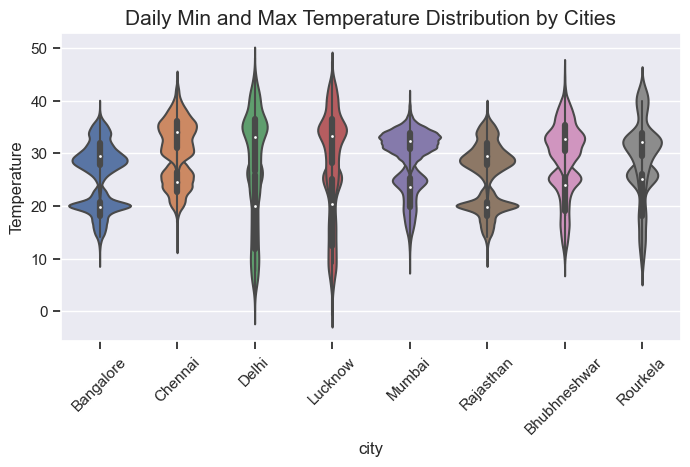

In [32]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style(style='darkgrid')
sns.violinplot(data = df,x='city', y='tmin', alpha = .01)
sns.violinplot(data = df,x='city', y='tmax')
ax.set_ylabel('Temperature')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Daily Min and Max Temperature Distribution by Cities', fontsize = 15)
plt.show()

In [33]:
df

,time,tavg,tmin,tmax,prcp,city,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,22.9,19.1,28.4,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,21.7,NaN,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,20.8,NaN,27.4,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-08-31 00:00:00,29.0,26.6,33.5,2.0,Rourkela,NaN,187.0,8.6,NaN,1006.8,NaN
422,2022-09-01 00:00:00,29.1,25.7,33.2,11.5,Rourkela,NaN,205.0,6.7,NaN,1007.2,NaN
423,2022-09-02 00:00:00,29.4,26.4,33.7,1.5,Rourkela,NaN,189.0,7.0,NaN,1007.5,NaN
424,2022-09-03 00:00:00,28.7,26.6,32.6,8.0,Rourkela,NaN,203.0,8.0,NaN,1005.8,NaN


In [34]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')


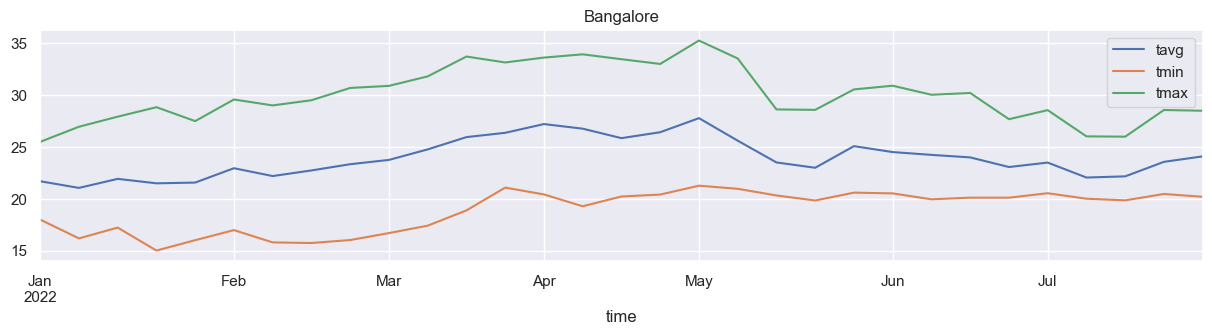

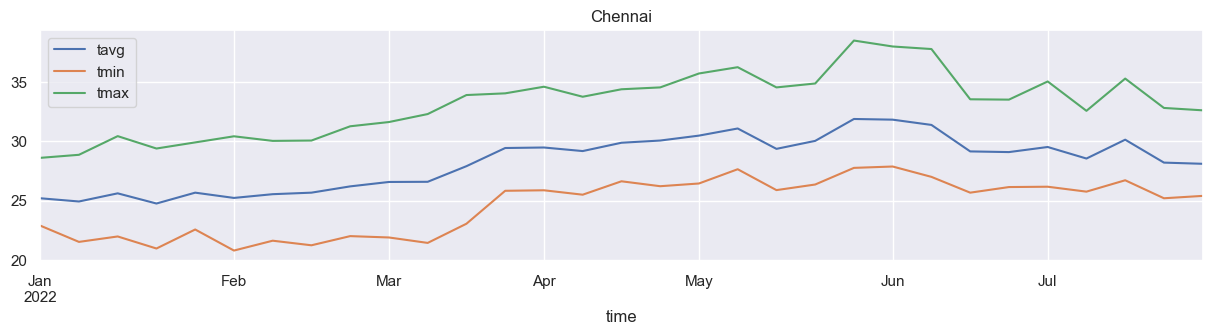

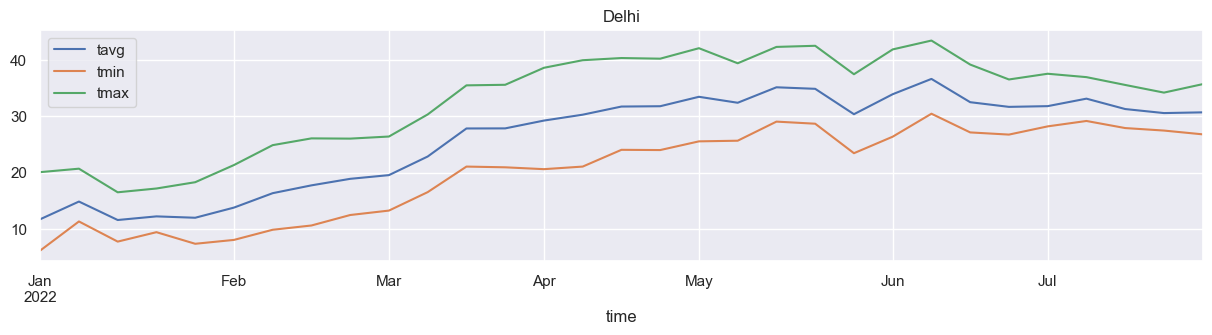

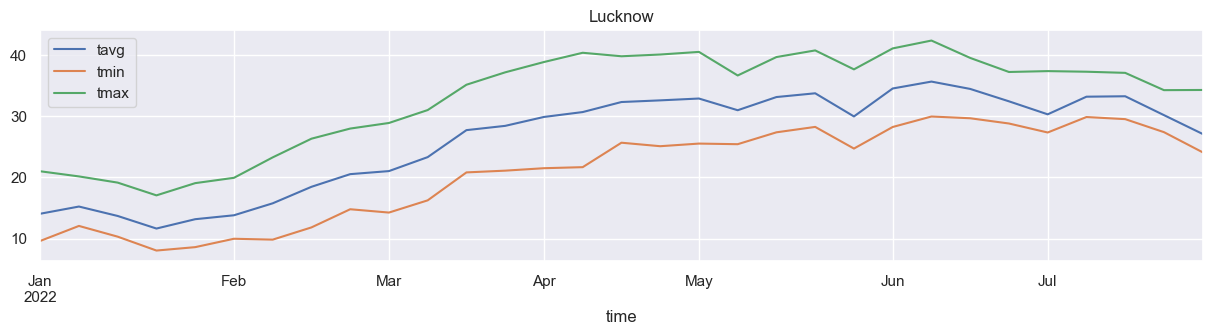

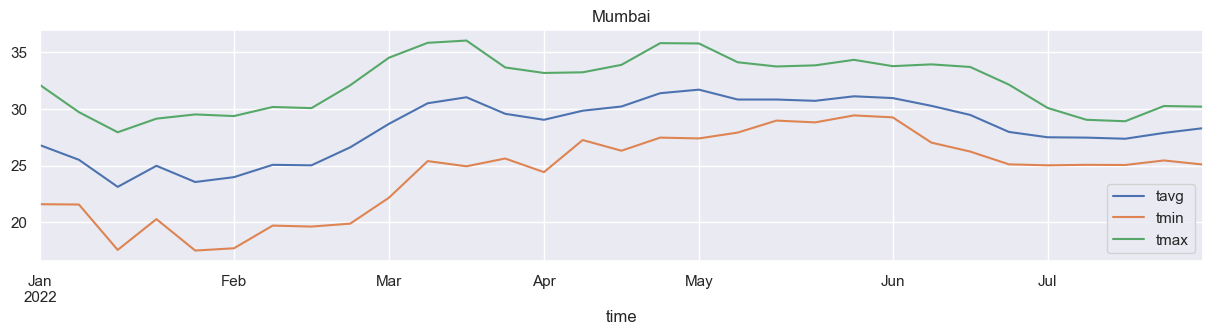

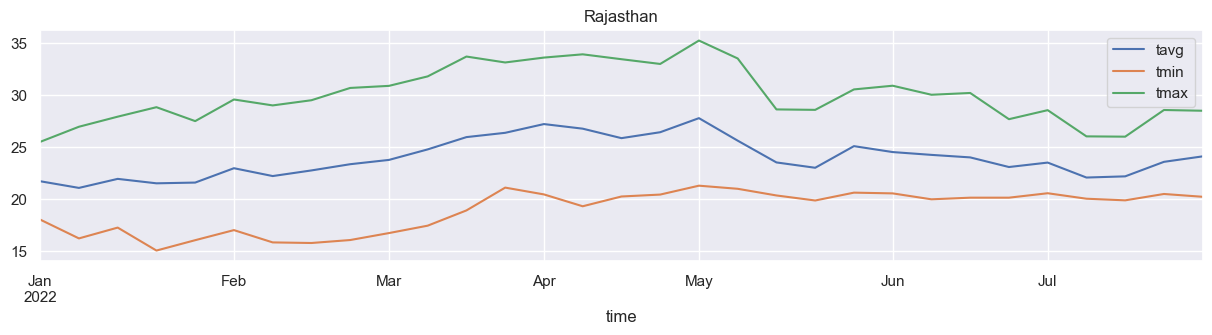

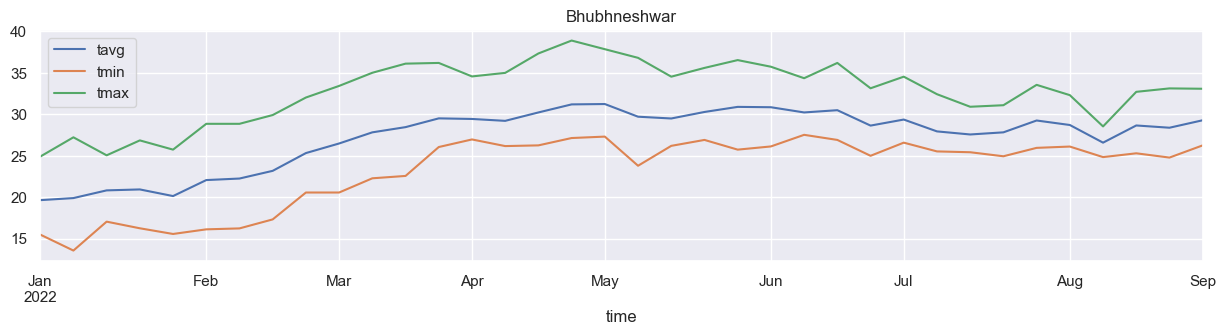

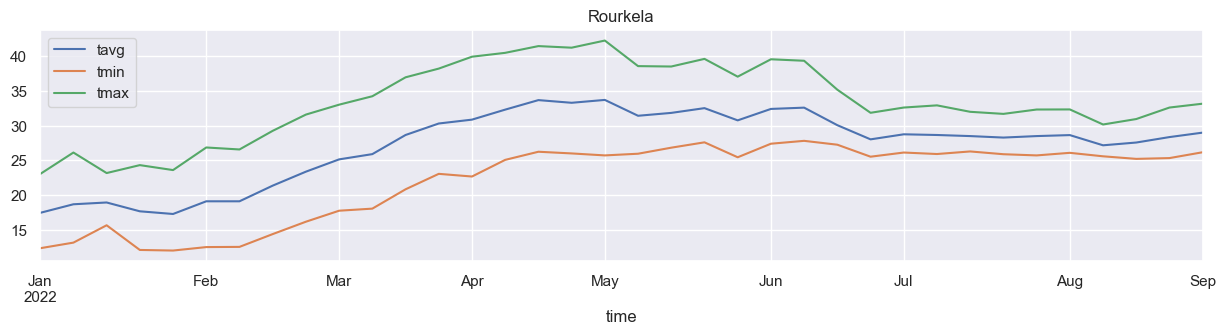

In [35]:
tdf = df.set_index('time')
cities = tdf['city'].unique()
year = 2022
for city in cities:
    try:
        tdf[(tdf['city'] ==city) & (tdf.index.year == year)].resample('W')['tavg','tmin','tmax'].mean().plot(kind='line', figsize=(15,3), title=f'{city}')
        plt.show()
    except:
        pass

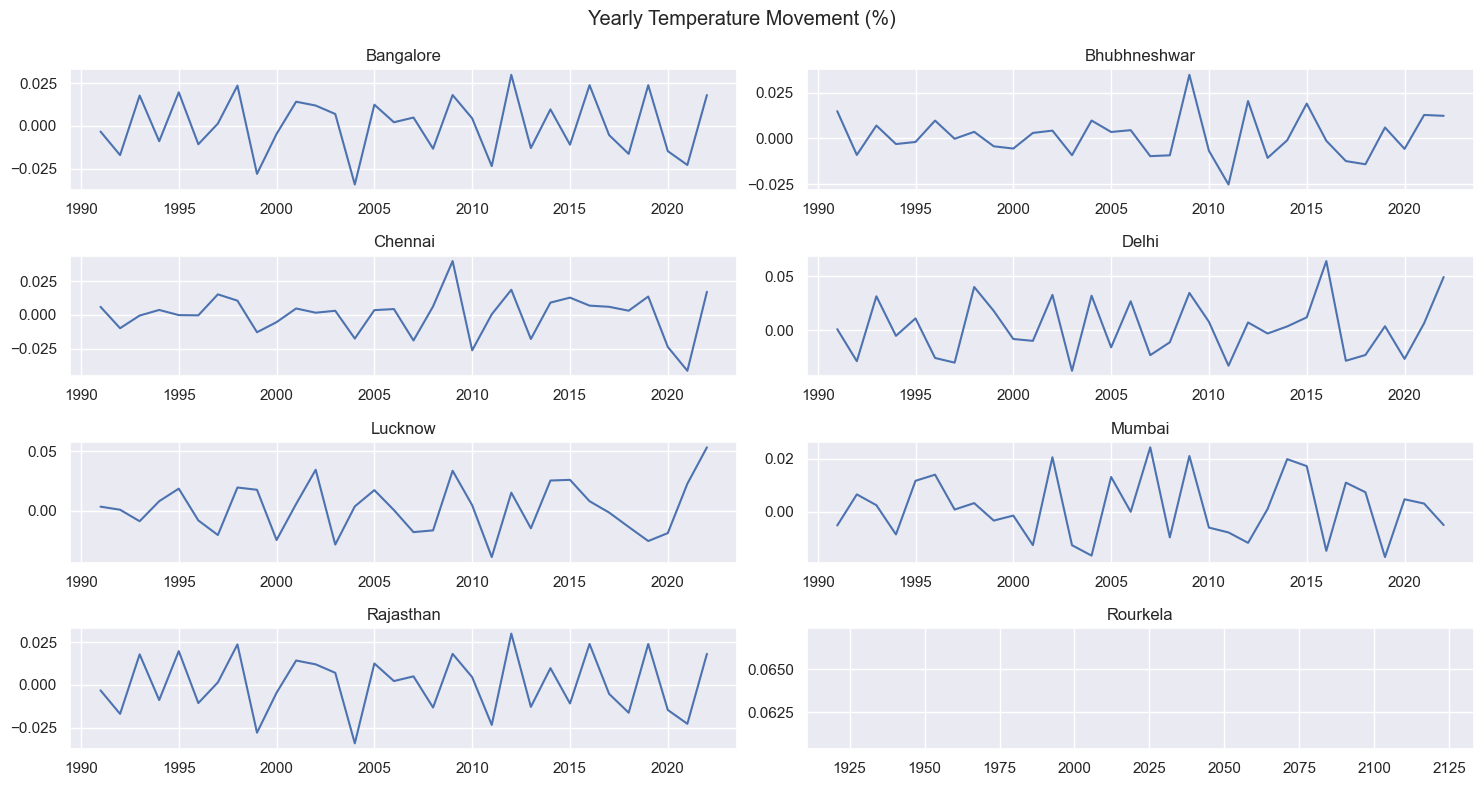

In [36]:
ts = df.set_index(['time', 'city'])

# multi index grouping on time series 'ts' using groupby and grouper functions
level_values=ts.index.get_level_values
ts = ts.groupby([level_values(i) for i in [1]]
                       +[pd.Grouper(freq='Y', level=0)]).mean()


yavg = ts.reset_index()
# adding a month column for plotting month on x axis
yavg['year'] = yavg['time'].dt.year


# Calculating temperature percentage change year over year

temp_change_percent = yavg.groupby('city')['tavg'].pct_change()
temp_change = pd.concat([yavg, temp_change_percent], axis=1)

fig,ax = plt.subplots(4, 2, figsize=(15, 8))
plt.suptitle('Yearly Temperature Movement (%)')

for city , ax in zip (temp_change.city.unique(), ax.flatten()):
    bang = temp_change.loc[(temp_change.city==city)]
    ax.plot(bang.year, bang.iloc[:, -1])
    ax.set_title(city)
    
plt.tight_layout()

In [37]:
yavg

,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year
0,Bangalore,1990-12-31,23.703134,19.093455,29.437049,2.245791,NaN,NaN,NaN,NaN,NaN,NaN,1990
1,Bangalore,1991-12-31,23.626111,18.985461,29.373871,3.739456,NaN,NaN,NaN,NaN,NaN,NaN,1991
2,Bangalore,1992-12-31,23.224148,18.485992,29.207097,2.320388,NaN,NaN,NaN,NaN,NaN,NaN,1992
3,Bangalore,1993-12-31,23.637673,18.708784,29.578997,2.574922,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,Bangalore,1994-12-31,23.427072,18.872340,29.233651,2.408125,NaN,NaN,NaN,NaN,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Rajasthan,2020-12-31,24.120492,19.880874,30.145628,5.677295,NaN,NaN,NaN,NaN,NaN,NaN,2020
229,Rajasthan,2021-12-31,23.570411,19.247671,29.245205,4.376164,NaN,NaN,NaN,NaN,NaN,NaN,2021
230,Rajasthan,2022-12-31,23.997087,18.896117,30.231068,3.924757,NaN,NaN,NaN,NaN,NaN,NaN,2022
231,Rourkela,2021-12-31,25.759218,22.202235,30.375419,7.200000,NaN,120.575419,6.915084,NaN,1007.927933,NaN,2021


In [38]:
mavg = ts.reset_index()
# adding a month column for plotting month on x axis
mavg['month'] = mavg['time'].dt.month_name()
mavg['year'] = mavg['time'].dt.year
mavg


,city,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month,year
0,Bangalore,1990-12-31,23.703134,19.093455,29.437049,2.245791,NaN,NaN,NaN,NaN,NaN,NaN,December,1990
1,Bangalore,1991-12-31,23.626111,18.985461,29.373871,3.739456,NaN,NaN,NaN,NaN,NaN,NaN,December,1991
2,Bangalore,1992-12-31,23.224148,18.485992,29.207097,2.320388,NaN,NaN,NaN,NaN,NaN,NaN,December,1992
3,Bangalore,1993-12-31,23.637673,18.708784,29.578997,2.574922,NaN,NaN,NaN,NaN,NaN,NaN,December,1993
4,Bangalore,1994-12-31,23.427072,18.872340,29.233651,2.408125,NaN,NaN,NaN,NaN,NaN,NaN,December,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Rajasthan,2020-12-31,24.120492,19.880874,30.145628,5.677295,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
229,Rajasthan,2021-12-31,23.570411,19.247671,29.245205,4.376164,NaN,NaN,NaN,NaN,NaN,NaN,December,2021
230,Rajasthan,2022-12-31,23.997087,18.896117,30.231068,3.924757,NaN,NaN,NaN,NaN,NaN,NaN,December,2022
231,Rourkela,2021-12-31,25.759218,22.202235,30.375419,7.200000,NaN,120.575419,6.915084,NaN,1007.927933,NaN,December,2021


In [39]:
import matplotlib
print(matplotlib.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


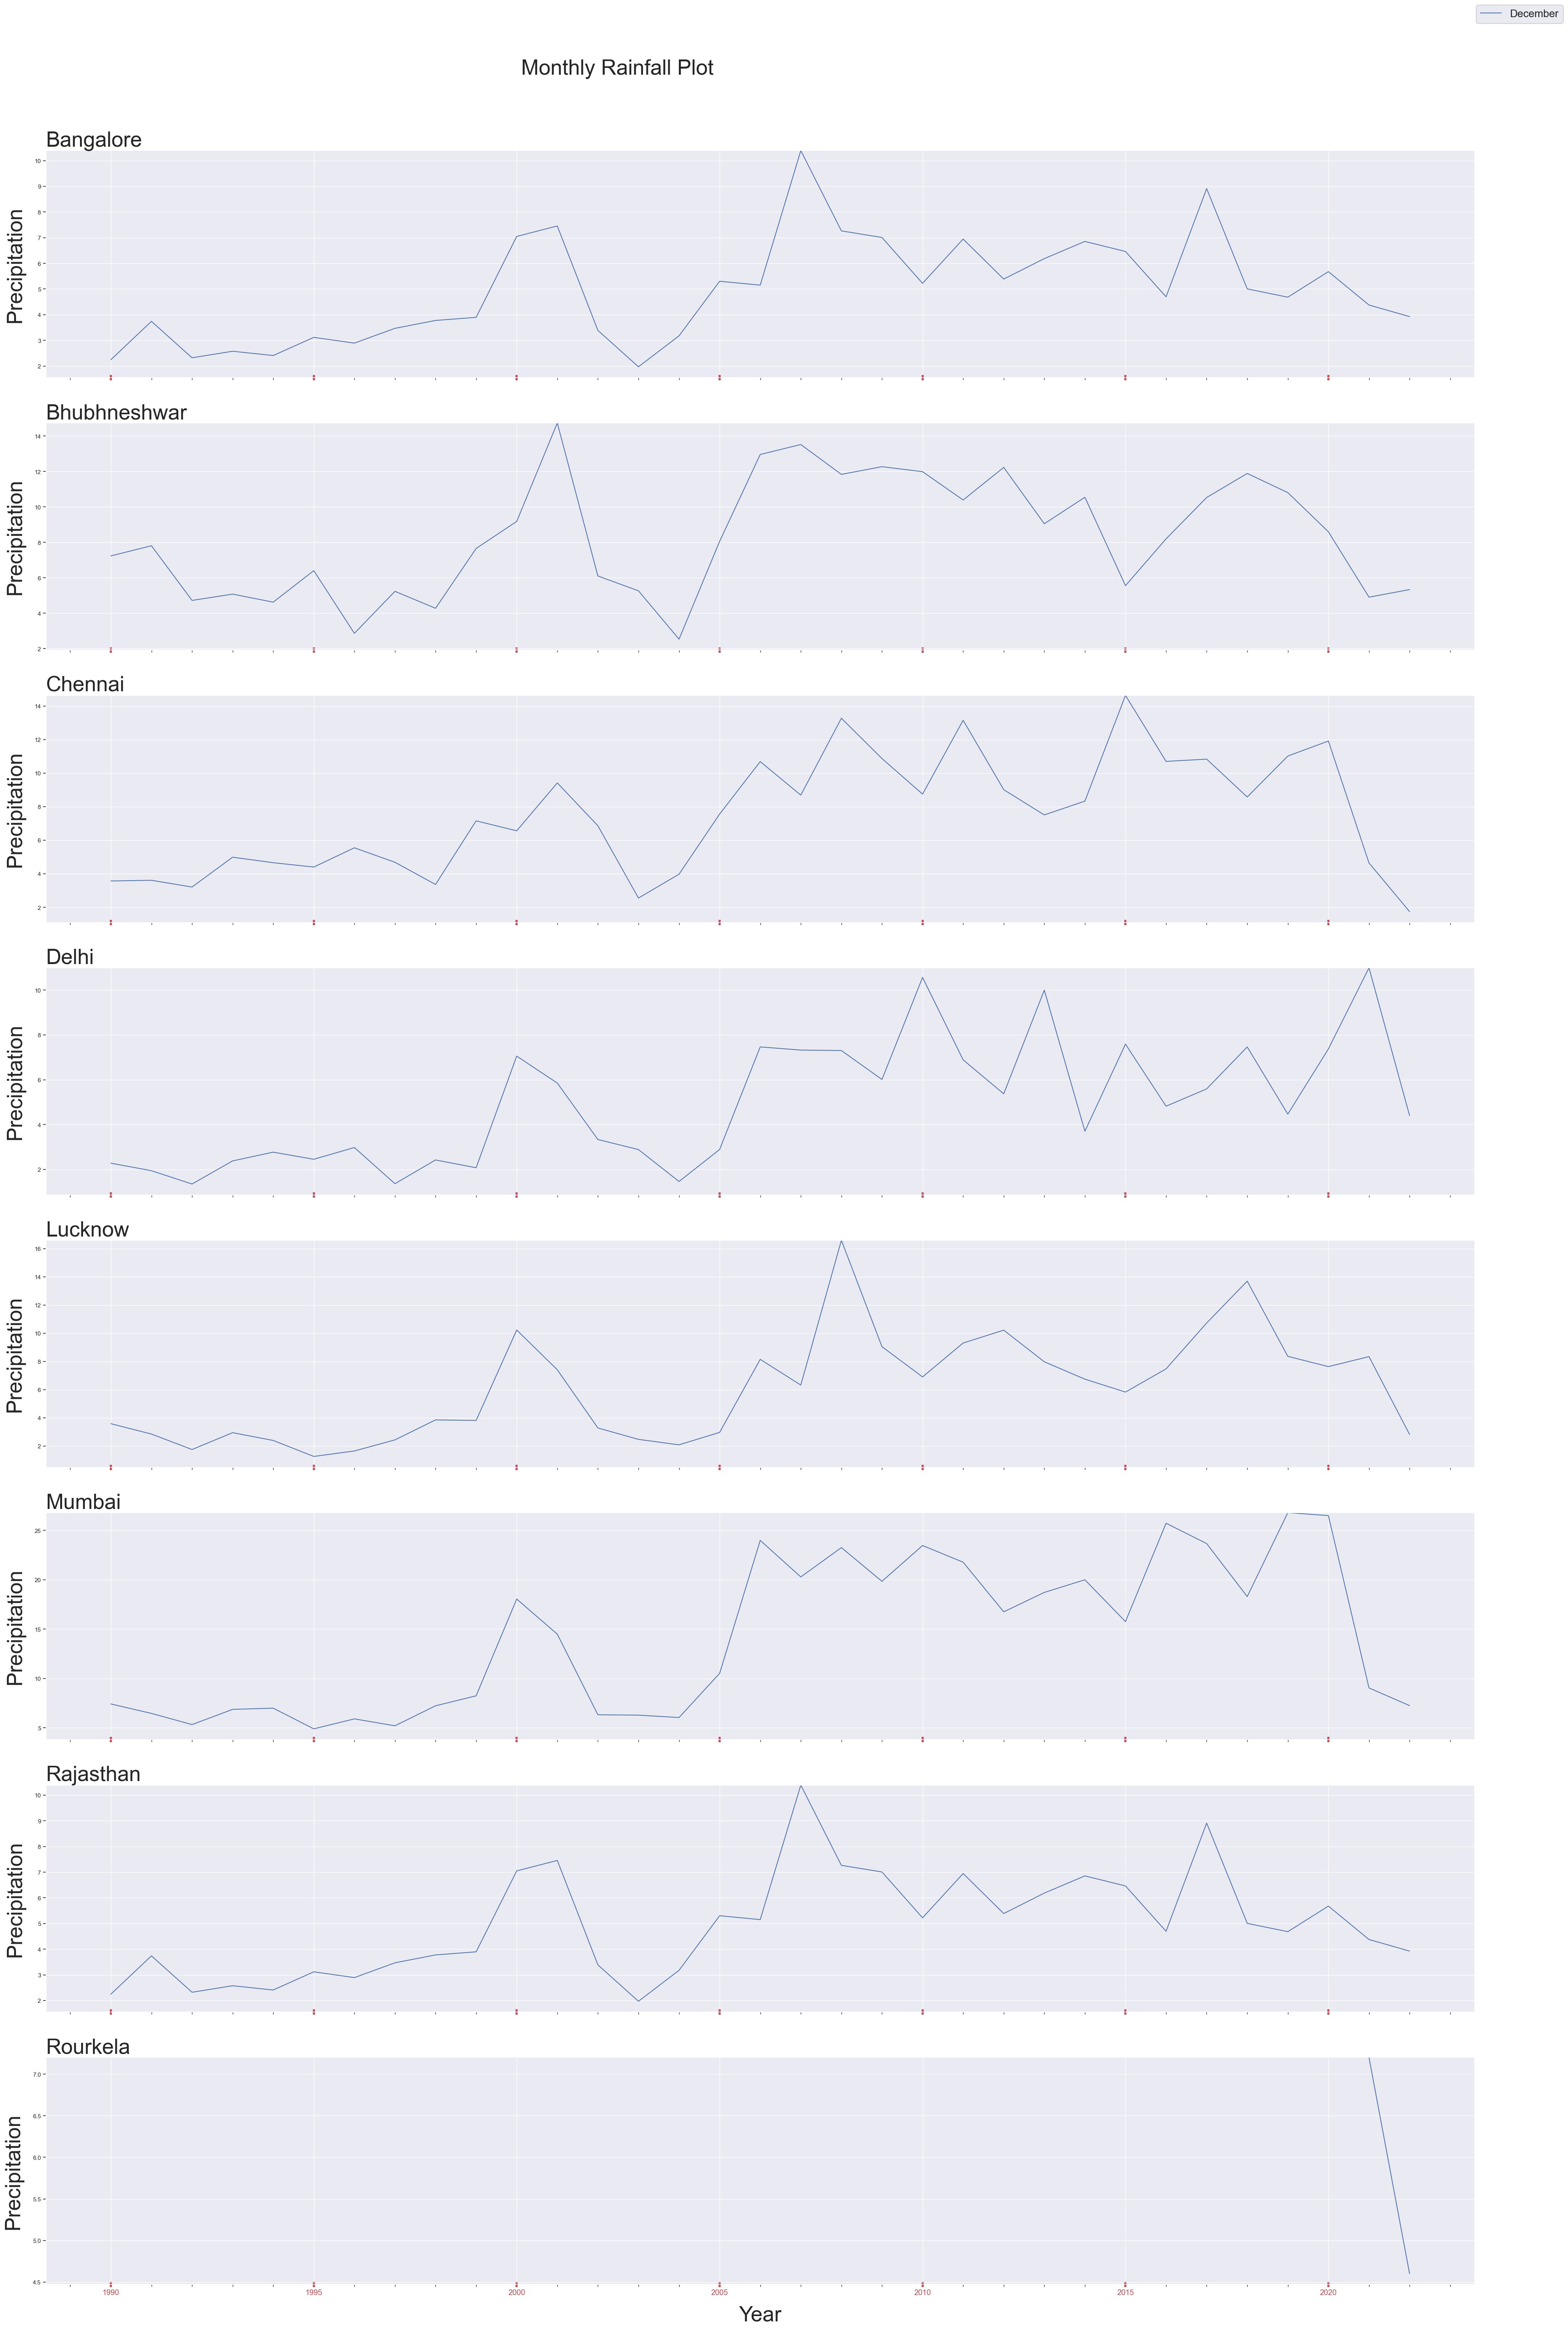

In [40]:
import matplotlib.ticker as tck
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
# plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(8,1, figsize=(50, 80), sharex=True) # constrained layout is used to avoid overlapping of axes

fig.subplots_adjust(top=0.95, bottom = 0.25, left = .2, right = .95, hspace = .2) # adjusting the edges of the subplots to create space for other artists in the figure

plt.suptitle('Monthly Rainfall Plot', fontsize = 40)


for city, ax in zip(mavg.city.unique(), ax.flatten()):
    city_prcp = mavg.loc[mavg.city==city]
    g = sns.lineplot(data = city_prcp, x = 'year', y='prcp', hue='month', ax=ax)
    g.legend_.remove() # remove legends within subplots
    

    handles, labels = ax.get_legend_handles_labels() # this code collects legend data for all subplots to creates a common legend at figure level
    
    # setting the labels and styling them
    ax.set_title(city, loc = 'left', fontsize = 40)
    ax.set_xlabel('Year', fontsize = 40, labelpad =18)
    ax.set_ylabel('Precipitation', fontsize = 40, labelpad =18)
    ax.set_ylim(ymax = city_prcp.prcp.max()) # setting ylimit in each subplot
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.xaxis.set_minor_formatter(tck.StrMethodFormatter(""))
    ax.tick_params(axis="x",which='major', labelsize='large', length=10, width=4,color='r', labelcolor='r', direction='inout')
    fig.legend(handles, labels, loc='upper right', fontsize = 20) # this creates a common legend at figure level
# plt.tight_layout() # comment this code as cannot be used with layout = contrained

In [41]:
plt.suptitle('Monthly Rainfall Plot', fontsize = 40)

Text(0.5, 0.98, 'Monthly Rainfall Plot')

<Figure size 640x480 with 0 Axes>

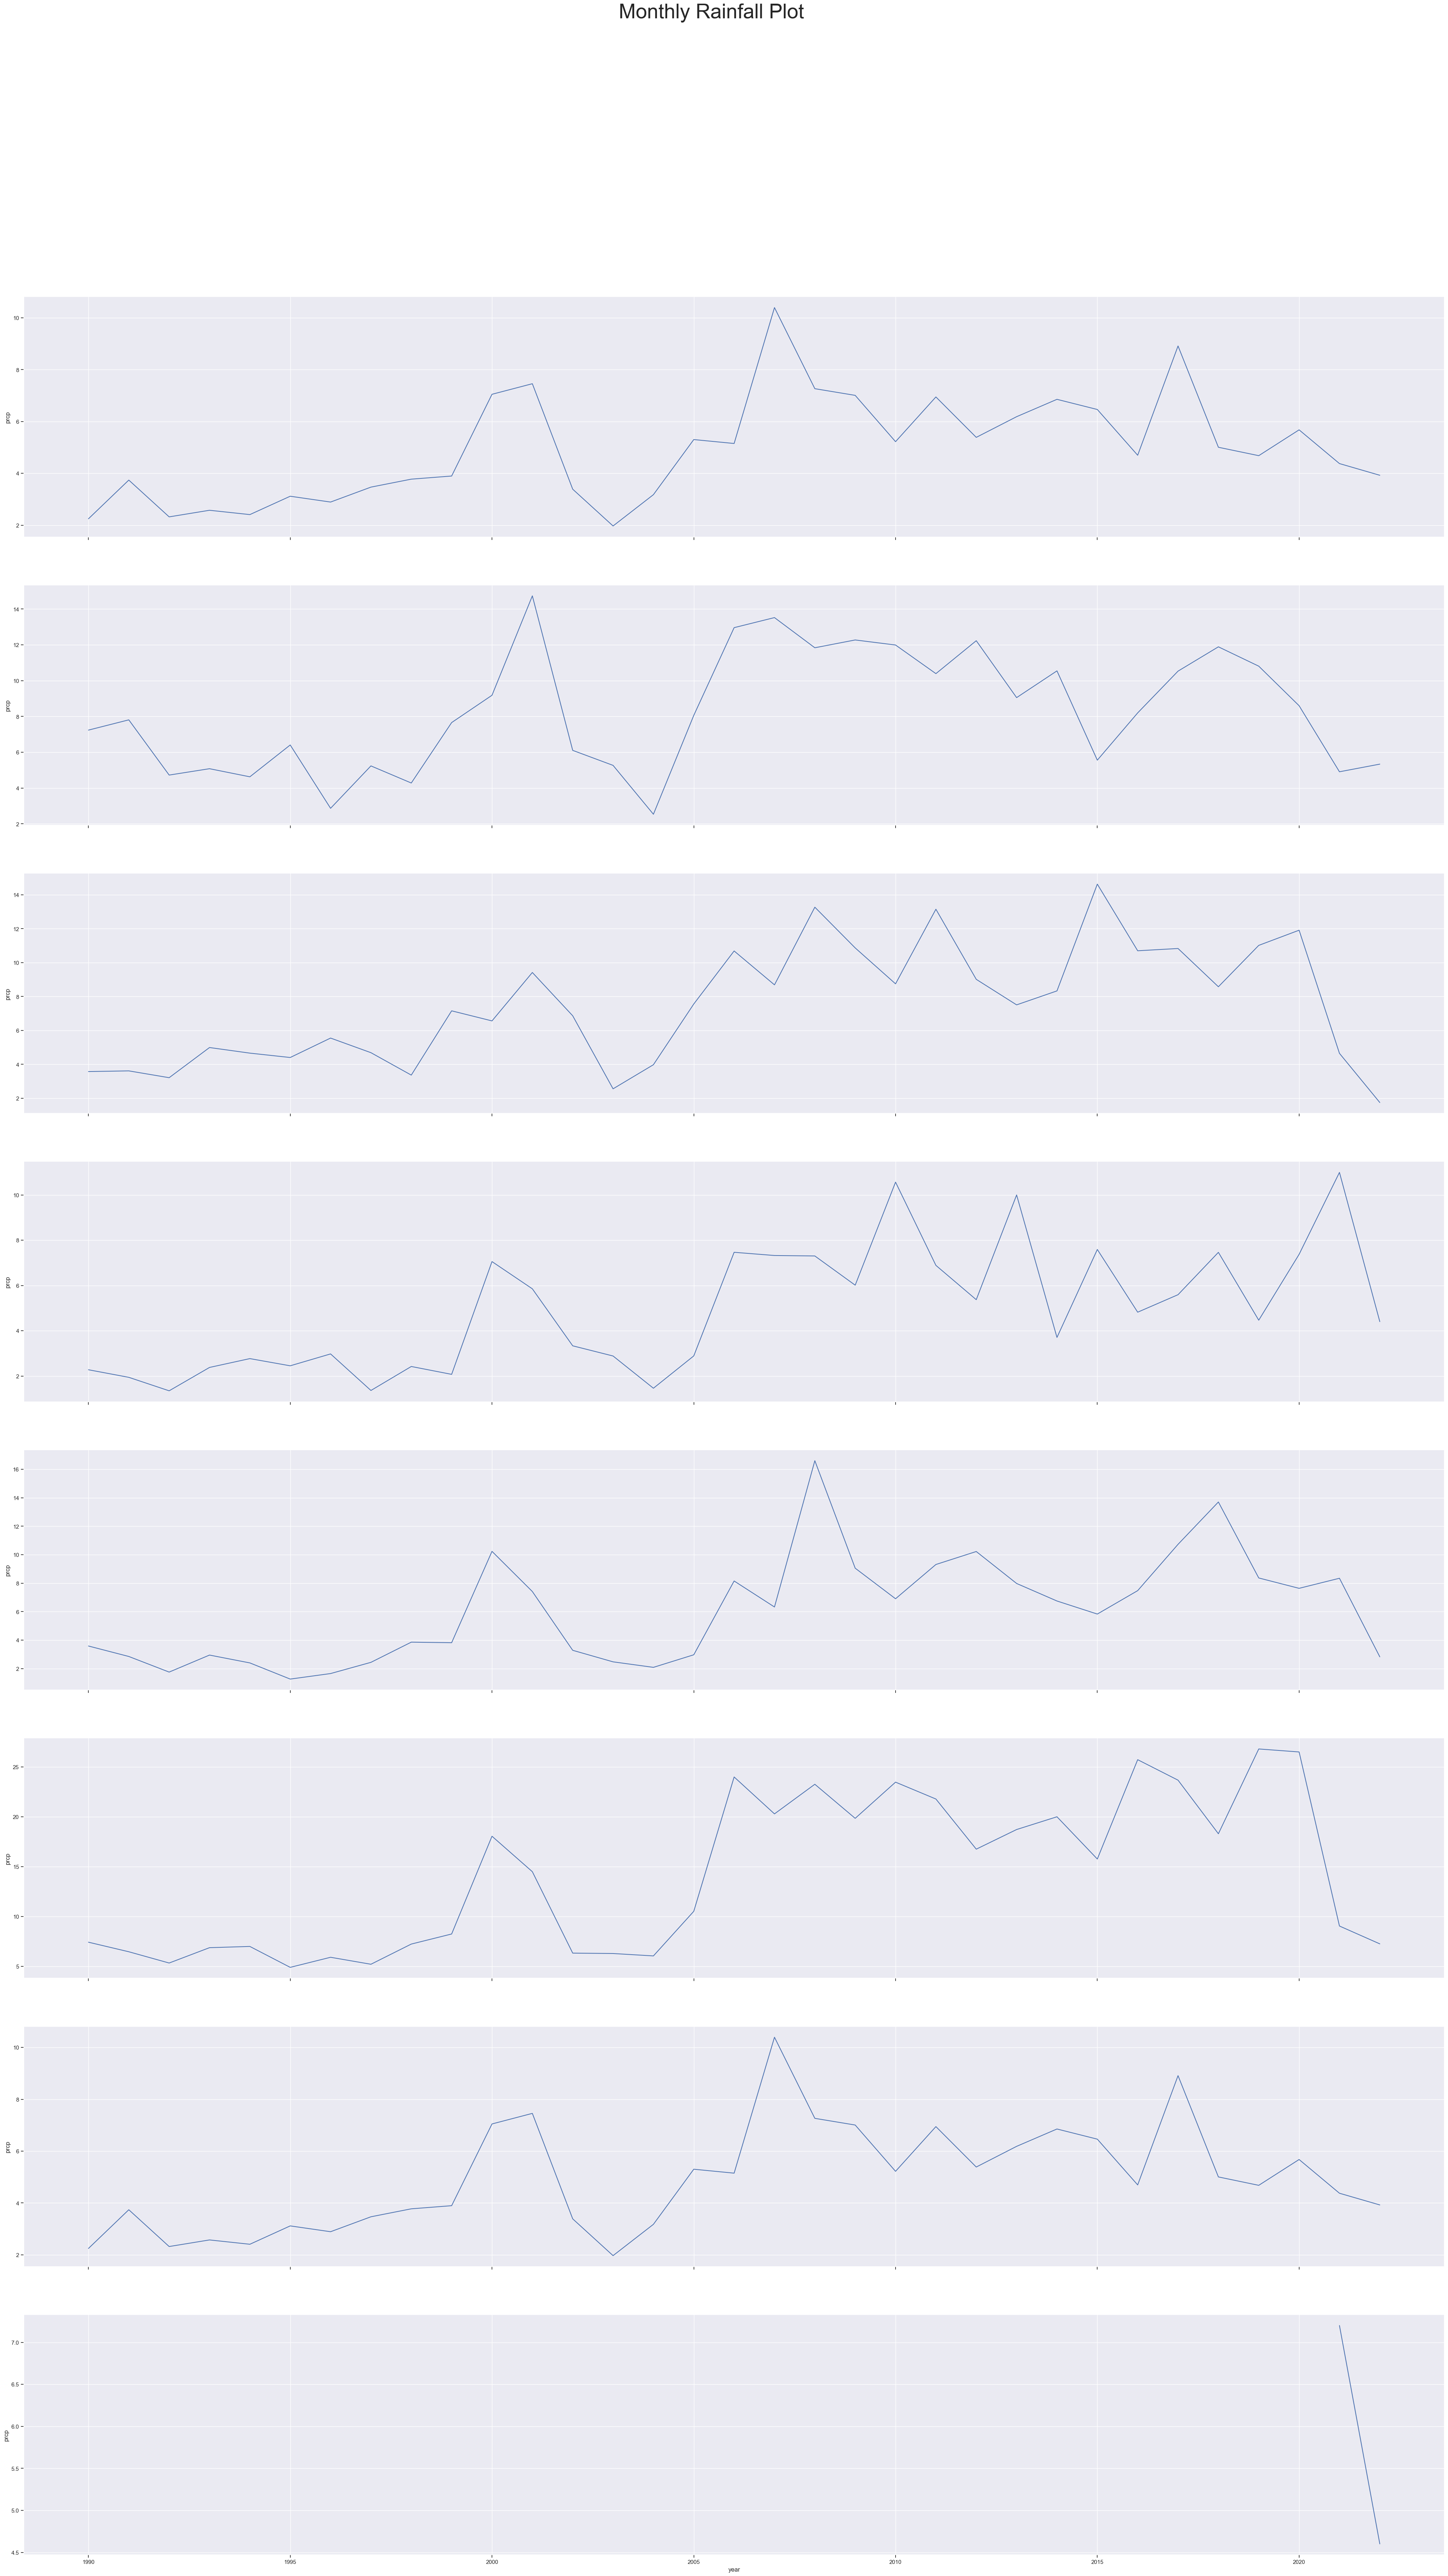

In [42]:
ig, ax = plt.subplots(8,1, figsize=(50, 80), sharex=True)
plt.suptitle('Monthly Rainfall Plot', fontsize = 40)


for city, ax in zip(mavg.city.unique(), ax.flatten()):
    city_prcp = mavg.loc[mavg.city==city]
    g = sns.lineplot(data = city_prcp, x = 'year', y='prcp', hue='month', ax=ax)
    g.legend_.remove() # remove legends within subplots
    handles, labels = ax.get_legend_handles_labels()